# AtliQ Hardware Customer Analysis

## Project Introduction

The goal of our analysis for AtliQ Hardware is to perform a customer analysis on their current clients and find a way to improve customer orders and grow the customer base. This analysis will only be performed on the sample database provided.

## Analysis Outline

To complete our goals, we are going to perform the following tasks:

•	Assess the data to find the largest customers by gross profit and sales volume.

•	Use value_counts to find where these businesses reside and identify other similar potential customers.

•	Count and group the products by popularity and by quality variant. 

•	Count and analyze which transaction is the most preferred. 

•	Make recommendations on which platform is most advantageous to sell on. 

•	Make recommendations of other popular products that other customers have frequently purchased.


## Importing Data from SQL

Importing libraries needed for the project

In [1]:
import pandas as pd
import sqlite3
from matplotlib import pyplot as plt

Using sqlite3 to connect to the SQLite file

In [2]:
try:
    con = sqlite3.connect('atliq_db.sqlite3')
except:
    con = sqlite3.connect('/datasets/atliq_db.sqlite3')

Checking the SQLite file for column names to later extract our data from for analysis

In [3]:
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('dim_customer',), ('dim_product',), ('fact_pre_discount',), ('fact_manufacturing_cost',), ('fact_gross_price',), ('fact_sales_monthly',)]


Converting the data from SQLite format to python for analysis

In [4]:
query_dim_customer = """Select * from 
dim_customer"""
dim_customer =  pd.read_sql_query(query_dim_customer, con)
dim_customer.head()

,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC
2,70003181,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
3,70003182,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
4,70004069,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC


In [5]:
query_dim_product = """Select * from 
dim_product"""
dim_product =  pd.read_sql_query(query_dim_product, con)
dim_product.head()

,product_code,division,segment,category,product,variant
0,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard
1,A0118150102,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Plus
2,A0118150103,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium
3,A0118150104,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium Plus
4,A0219150201,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard


In [6]:
query_fact_gross_price = """Select * from 
fact_gross_price"""
fact_gross_price =  pd.read_sql_query(query_fact_gross_price, con)
fact_gross_price.head()

,product_code,fiscal_year,gross_price
0,A0118150101,2018,15.3952
1,A0118150101,2019,14.4392
2,A0118150101,2020,16.2323
3,A0118150101,2021,19.0573
4,A0118150102,2018,19.5875


In [7]:
query_fact_sales_monthly = """Select * from 
fact_sales_monthly"""
fact_sales_monthly =  pd.read_sql_query(query_fact_sales_monthly, con)
fact_sales_monthly.head()

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70002017.0,51.0,2018.0
1,2017-09-01,A0118150101,70002018.0,77.0,2018.0
2,2017-09-01,A0118150101,70003181.0,17.0,2018.0
3,2017-09-01,A0118150101,70003182.0,6.0,2018.0
4,2017-09-01,A0118150101,70006157.0,5.0,2018.0


## Pre-processing the Data

Processing all the dataframes for non-snakecase columns, and elements, duplicate entries, and null values

##### Pre-processing dim_customer dataframe

Checking for number of entries, data types, and memory usage

In [8]:
dim_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_code  209 non-null    int64 
 1   customer       209 non-null    object
 2   platform       209 non-null    object
 3   channel        209 non-null    object
 4   market         209 non-null    object
 5   sub_zone       209 non-null    object
 6   region         209 non-null    object
dtypes: int64(1), object(6)
memory usage: 11.6+ KB


Checking to see if all the columns names are in snakecase format

In [9]:
dim_customer.columns

Index(['customer_code', 'customer', 'platform', 'channel', 'market',
       'sub_zone', 'region'],
      dtype='object')

In [10]:
dim_customer['customer_code'].nunique()

209

By using nunique on customer codes column it shows that there are 209 unique customers and since there are 209 entries it shows that there are no duplicate customer codes

Looking at the customers column to see if the data entries are in snakecase format and to see if there are any duplicates

In [11]:
dim_customer['customer'].sort_values().unique()

array(['Acclaimed Stores', 'All-Out', 'Amazon', 'Amazon ',
       "Argos (Sainsbury's)", 'Atlas Stores', 'Atliq Exclusive',
       'Atliq e Store', 'BestBuy', 'Billa', 'Boulanger', 'Chip 7',
       'Chiptec', 'Circuit City', 'Control', 'Coolblue', 'Costco',
       'Croma', 'Currys (Dixons Carphone)', 'Digimarket', 'Ebay',
       'Electricalsara Stores', 'Electricalsbea Stores',
       'Electricalslance Stores', 'Electricalslytical',
       'Electricalsocity', 'Electricalsquipo Stores', 'Elite', 'Elkjøp',
       'Epic Stores', 'Euronics', 'Expert', 'Expression', 'Ezone',
       'Flawless Stores', 'Flipkart', 'Fnac-Darty', 'Forward Stores',
       'Girias', 'Info Stores', 'Insight', 'Integration Stores', 'Leader',
       'Logic Stores', 'Lotus', 'Mbit', 'Media Markt', 'Neptune',
       'Nomad Stores', 'Notebillig', 'Nova', 'Novus', 'Otto', 'Path',
       'Power', 'Premium Stores', 'Propel', 'Radio Popular',
       'Radio Shack', 'Reliance Digital', 'Relief', 'Sage', 'Saturn',
       'Sor

After looking at the list of customers, it shows that many entries to be changed to snakecase format and Amazon was inputed twice with one mistyped entry. Also, Atliq Exclusive and Atliq e Store can be seen as mistyped / duplicates and so we need to check if they are different.

In [12]:
dim_customer[dim_customer['customer'] == 'Atliq Exclusive'].head()

,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
2,70003181,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
4,70004069,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC
7,70006157,Atliq Exclusive,Brick & Mortar,Direct,Philiphines,ROA,APAC
9,70007198,Atliq Exclusive,Brick & Mortar,Direct,South Korea,ROA,APAC


In [13]:
dim_customer[dim_customer['customer'] == 'Atliq e Store'].head()

,customer_code,customer,platform,channel,market,sub_zone,region
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC
3,70003182,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
5,70004070,Atliq e Store,E-Commerce,Direct,Japan,ROA,APAC
6,70005163,Atliq e Store,E-Commerce,Direct,Pakistan,ROA,APAC
8,70006158,Atliq e Store,E-Commerce,Direct,Philiphines,ROA,APAC


It shows that Atliq Exclusive is a brick and mortar business and Atliq e Store is an ecommerce business showing that they are different businesses

Now we need to change this column to snakecase and remove the mistyped amazon entry

In [14]:
dim_customer['customer'] = dim_customer['customer'].str.lower()
dim_customer['customer'] = dim_customer['customer'].str.replace(' ', '_')
dim_customer['customer'] = dim_customer['customer'].replace('amazon_', 'amazon')

In [15]:
dim_customer['customer'].sort_values().unique()

array(['acclaimed_stores', 'all-out', 'amazon', "argos_(sainsbury's)",
       'atlas_stores', 'atliq_e_store', 'atliq_exclusive', 'bestbuy',
       'billa', 'boulanger', 'chip_7', 'chiptec', 'circuit_city',
       'control', 'coolblue', 'costco', 'croma',
       'currys_(dixons_carphone)', 'digimarket', 'ebay',
       'electricalsara_stores', 'electricalsbea_stores',
       'electricalslance_stores', 'electricalslytical',
       'electricalsocity', 'electricalsquipo_stores', 'elite', 'elkjøp',
       'epic_stores', 'euronics', 'expert', 'expression', 'ezone',
       'flawless_stores', 'flipkart', 'fnac-darty', 'forward_stores',
       'girias', 'info_stores', 'insight', 'integration_stores', 'leader',
       'logic_stores', 'lotus', 'mbit', 'media_markt', 'neptune',
       'nomad_stores', 'notebillig', 'nova', 'novus', 'otto', 'path',
       'power', 'premium_stores', 'propel', 'radio_popular',
       'radio_shack', 'reliance_digital', 'relief', 'sage', 'saturn',
       'sorefoz', 'sou

Checking the platform column for snakecase format and duplicates

In [16]:
dim_customer['platform'].sort_values().unique()

array(['Brick & Mortar', 'E-Commerce'], dtype=object)

Changing platform column to snakecase format

In [17]:
dim_customer['platform'] = dim_customer['platform'].str.lower()
dim_customer['platform'] = dim_customer['platform'].str.replace(' ', '_')

In [18]:
dim_customer['platform'].sort_values().unique()

array(['brick_&_mortar', 'e-commerce'], dtype=object)

Checking the channel column for snakecase format and duplicates

In [19]:
dim_customer['channel'].sort_values().unique()

array(['Direct', 'Distributor', 'Retailer'], dtype=object)

Changing the channel column to snakecase format

In [20]:
dim_customer['channel'] = dim_customer['channel'].str.lower()

In [21]:
dim_customer['channel'].sort_values().unique()

array(['direct', 'distributor', 'retailer'], dtype=object)

Checking the market column for snakecase format and duplicates

In [22]:
dim_customer['market'].sort_values().unique()

array(['Australia', 'Austria', 'Bangladesh', 'Brazil', 'Canada', 'Chile',
       'China', 'Columbia', 'France', 'Germany', 'India', 'Indonesia',
       'Italy', 'Japan', 'Mexico', 'Netherlands', 'Newzealand', 'Norway',
       'Pakistan', 'Philiphines', 'Poland', 'Portugal', 'South Korea',
       'Spain', 'Sweden', 'USA', 'United Kingdom'], dtype=object)

Changing market column to snakecase format

In [23]:
dim_customer['market'] = dim_customer['market'].str.lower()
dim_customer['market'] = dim_customer['market'].str.replace(' ', '_')

In [24]:
dim_customer['market'].sort_values().unique()

array(['australia', 'austria', 'bangladesh', 'brazil', 'canada', 'chile',
       'china', 'columbia', 'france', 'germany', 'india', 'indonesia',
       'italy', 'japan', 'mexico', 'netherlands', 'newzealand', 'norway',
       'pakistan', 'philiphines', 'poland', 'portugal', 'south_korea',
       'spain', 'sweden', 'united_kingdom', 'usa'], dtype=object)

Checking the sub_zone column for snakecase format and duplicates

In [25]:
dim_customer['sub_zone'].sort_values().unique()

array(['ANZ', 'India', 'LATAM', 'NA', 'NE', 'ROA', 'SE'], dtype=object)

Changing sub_zone to snakecase format

In [26]:
dim_customer['sub_zone'] = dim_customer['sub_zone'].str.lower()

In [27]:
dim_customer['sub_zone'].sort_values().unique()

array(['anz', 'india', 'latam', 'na', 'ne', 'roa', 'se'], dtype=object)

Checking the region column for snakecase format and duplicates

In [28]:
dim_customer['region'].sort_values().unique()

array(['APAC', 'EU', 'LATAM', 'NA'], dtype=object)

Changing region column to snakecase format

In [29]:
dim_customer['region'] = dim_customer['region'].str.lower()

In [30]:
dim_customer['region'].sort_values().unique()

array(['apac', 'eu', 'latam', 'na'], dtype=object)

Checking for duplicate entries

In [31]:
dim_customer.duplicated().sum()

0

Checking for null values

In [32]:
dim_customer.isnull().sum()

customer_code    0
customer         0
platform         0
channel          0
market           0
sub_zone         0
region           0
dtype: int64

Changing some of the object columns into category data type to lower memory usage

In [33]:
dim_customer['platform'] = dim_customer['platform'].astype('category')
dim_customer['channel'] = dim_customer['channel'].astype('category')
dim_customer['market'] = dim_customer['market'].astype('category')
dim_customer['sub_zone'] = dim_customer['sub_zone'].astype('category')
dim_customer['region'] = dim_customer['region'].astype('category')

In [34]:
dim_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   customer_code  209 non-null    int64   
 1   customer       209 non-null    object  
 2   platform       209 non-null    category
 3   channel        209 non-null    category
 4   market         209 non-null    category
 5   sub_zone       209 non-null    category
 6   region         209 non-null    category
dtypes: category(5), int64(1), object(1)
memory usage: 6.5+ KB


Previously the memory usage was 11+ KB and now it is 6.5+ KB

##### Pre-processing dim_product dataframe

Checking for number of entries, data types, and memory usage

In [35]:
dim_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  397 non-null    object
 1   division      397 non-null    object
 2   segment       397 non-null    object
 3   category      397 non-null    object
 4   product       397 non-null    object
 5   variant       397 non-null    object
dtypes: object(6)
memory usage: 18.7+ KB


Checking to see if all the columns names are in snakecase format

In [36]:
dim_product.columns

Index(['product_code', 'division', 'segment', 'category', 'product',
       'variant'],
      dtype='object')

Checking to see if the division column is in snakecase format and if there are any duplicates

In [37]:
dim_product['division'].sort_values().unique()

array(['N & S', 'P & A', 'PC'], dtype=object)

Converting this column to snakecase format

In [38]:
dim_product['division'] = dim_product['division'].str.lower()
dim_product['division'] = dim_product['division'].str.replace(' ', '_')

In [39]:
dim_product['division'].sort_values().unique()

array(['n_&_s', 'p_&_a', 'pc'], dtype=object)

Checking to see if the segment column is in snakecase format and if there are any duplicates

In [40]:
dim_product['segment'].sort_values().unique()

array(['Accessories', 'Desktop', 'Networking', 'Notebook', 'Peripherals',
       'Storage'], dtype=object)

Converting this column to snakecase format

In [41]:
dim_product['segment'] = dim_product['segment'].str.lower()

In [42]:
dim_product['segment'].sort_values().unique()

array(['accessories', 'desktop', 'networking', 'notebook', 'peripherals',
       'storage'], dtype=object)

Checking to see if the category column is in snakecase format and if there are any duplicates

In [43]:
dim_product['category'].sort_values().unique()

array(['Batteries', 'Business Laptop', 'External Solid State Drives',
       'Gaming Laptop', 'Graphic Card', 'Internal HDD', 'Keyboard',
       'MotherBoard', 'Mouse', 'Personal Desktop', 'Personal Laptop',
       'Processors', 'USB Flash Drives', 'Wi fi extender'], dtype=object)

Converting this column to snakecase format

In [44]:
dim_product['category'] = dim_product['category'].str.lower()
dim_product['category'] = dim_product['category'].str.replace(' ', '_')

In [45]:
dim_product['category'].sort_values().unique()

array(['batteries', 'business_laptop', 'external_solid_state_drives',
       'gaming_laptop', 'graphic_card', 'internal_hdd', 'keyboard',
       'motherboard', 'mouse', 'personal_desktop', 'personal_laptop',
       'processors', 'usb_flash_drives', 'wi_fi_extender'], dtype=object)

Checking to see if the product column is in snakecase format and if there are any duplicates

In [46]:
dim_product['product'].sort_values().unique()

array(['AQ 5000 Series Electron 8 5900X Desktop Processor',
       'AQ 5000 Series Electron 9 5900X Desktop Processor',
       'AQ 5000 Series Ultron 8 5900X Desktop Processor', 'AQ Aspiron',
       'AQ BZ 101', 'AQ BZ Allin1', 'AQ BZ Allin1 Gen 2', 'AQ BZ Compact',
       'AQ BZ Gen Y', 'AQ BZ Gen Z', 'AQ Clx1', 'AQ Clx2', 'AQ Clx3',
       'AQ Digit', 'AQ Digit SSD',
       'AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache',
       'AQ Electron 3 3600 Desktop Processor',
       'AQ Electron 4 3600 Desktop Processor',
       'AQ Electron 5 3600 Desktop Processor', 'AQ Elite', 'AQ F16',
       'AQ GEN Z', 'AQ GT 21', 'AQ Gamer 1', 'AQ Gamer 2', 'AQ Gamer 3',
       'AQ Gamers ', 'AQ Gamers Ms', 'AQ Gen X', 'AQ Gen Y',
       'AQ HOME Allin1 Gen 2', 'AQ Home Allin1', 'AQ LION x1',
       'AQ LION x2', 'AQ LION x3', 'AQ Lite', 'AQ Lite Ms', 'AQ Lumina',
       'AQ Lumina Ms', 'AQ MB Crossx', 'AQ MB Crossx 2', 'AQ MB Elite',
       'AQ MB Lito', 'AQ MB Lito 2', 'AQ Marquee P3',

Converting this column to snakecase format

In [47]:
dim_product['product'] = dim_product['product'].str.lower()
dim_product['product'] = dim_product['product'].str.replace(' ', '_')

In [48]:
dim_product['product'].sort_values().unique()

array(['aq_5000_series_electron_8_5900x_desktop_processor',
       'aq_5000_series_electron_9_5900x_desktop_processor',
       'aq_5000_series_ultron_8_5900x_desktop_processor', 'aq_aspiron',
       'aq_bz_101', 'aq_bz_allin1', 'aq_bz_allin1_gen_2', 'aq_bz_compact',
       'aq_bz_gen_y', 'aq_bz_gen_z', 'aq_clx1', 'aq_clx2', 'aq_clx3',
       'aq_digit', 'aq_digit_ssd',
       'aq_dracula_hdd_–_3.5_inch_sata_6_gb/s_5400_rpm_256_mb_cache',
       'aq_electron_3_3600_desktop_processor',
       'aq_electron_4_3600_desktop_processor',
       'aq_electron_5_3600_desktop_processor', 'aq_elite', 'aq_f16',
       'aq_gamer_1', 'aq_gamer_2', 'aq_gamer_3', 'aq_gamers_',
       'aq_gamers_ms', 'aq_gen_x', 'aq_gen_y', 'aq_gen_z', 'aq_gt_21',
       'aq_home_allin1', 'aq_home_allin1_gen_2', 'aq_lion_x1',
       'aq_lion_x2', 'aq_lion_x3', 'aq_lite', 'aq_lite_ms', 'aq_lumina',
       'aq_lumina_ms', 'aq_marquee_p3', 'aq_marquee_p4',
       'aq_master_wired_x1', 'aq_master_wired_x1_ms',
       'aq_mas

Checking to see if the variant column is in snakecase format and if there are any duplicates

In [49]:
dim_product['variant'].sort_values().unique()

array(['Plus', 'Plus 1', 'Plus 1 ', 'Plus 2', 'Plus 3', 'Plus Black',
       'Plus Blue', 'Plus Cool Blue', 'Plus Firey Red', 'Plus Grey',
       'Plus Red', 'Premium', 'Premium 1', 'Premium 2', 'Premium Black',
       'Premium Misty Green', 'Premium Plus', 'Standard', 'Standard 1',
       'Standard 2', 'Standard 3', 'Standard Black', 'Standard Blue',
       'Standard Cool Blue', 'Standard Firey Red', 'Standard Grey',
       'Standard Red'], dtype=object)

The various variant values can be generally seen as standard, plus and premium and so renaming all variant entries into these three general variants would simplify this column for analysis. 

In [50]:
dim_product['variant'] = dim_product['variant'].replace('Standard 2', 'Standard').replace('Standard 1', 'Standard').replace('Standard Grey', 'Standard').replace('Standard Blue', 'Standard').replace('Standard Red', 'Standard').replace('Standard 3', 'Standard').replace('Standard Black', 'Standard').replace('Standard Cool Blue', 'Standard').replace('Standard Firey Red', 'Standard')

In [51]:
dim_product['variant'] = dim_product['variant'].replace('Plus 2', 'Plus').replace('Plus 1', 'Plus').replace('Plus 3', 'Plus').replace('Plus Grey', 'Plus').replace('Plus Blue', 'Plus').replace('Plus Red', 'Plus').replace('Plus Firey Red', 'Plus').replace('Plus Cool Blue', 'Plus').replace('Plus Black', 'Plus').replace('Plus 1 ', 'Plus')

In [52]:
dim_product['variant'] = dim_product['variant'].replace('Premium Plus', 'Premium').replace('Premium 1', 'Premium').replace('Premium 2', 'Premium').replace('Premium Black', 'Premium').replace('Premium Misty Green', 'Premium')

Converting this column to snakecase format

In [53]:
dim_product['variant'] = dim_product['variant'].str.lower()

In [54]:
dim_product['variant'].sort_values().unique()

array(['plus', 'premium', 'standard'], dtype=object)

Checking for duplicate entries

In [55]:
dim_product.duplicated().sum()

0

Checking for null values

In [56]:
dim_product.isnull().sum()

product_code    0
division        0
segment         0
category        0
product         0
variant         0
dtype: int64

##### Pre-processing fact_gross_price dataframe

Checking for number of entries, data types, and memory usage

In [57]:
fact_gross_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_code  1182 non-null   object 
 1   fiscal_year   1182 non-null   int64  
 2   gross_price   1182 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.8+ KB


Checking to see if all the columns names are in snakecase format

In [58]:
fact_gross_price.columns

Index(['product_code', 'fiscal_year', 'gross_price'], dtype='object')

Checking for duplicate entries

In [59]:
fact_gross_price.duplicated().sum()

0

Checking for null values

In [60]:
fact_gross_price.isnull().sum()

product_code    0
fiscal_year     0
gross_price     0
dtype: int64

##### Pre-processing fact_sales_monthly dataframe

Checking for number of entries, data types, and memory usage

In [61]:
fact_sales_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67251 entries, 0 to 67250
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           67251 non-null  object 
 1   product_code   67251 non-null  object 
 2   customer_code  67250 non-null  float64
 3   sold_quantity  67250 non-null  float64
 4   fiscal_year    67250 non-null  float64
dtypes: float64(3), object(2)
memory usage: 2.6+ MB


Checking to see if all the columns names are in snakecase format

In [62]:
fact_sales_monthly.columns

Index(['date', 'product_code', 'customer_code', 'sold_quantity',
       'fiscal_year'],
      dtype='object')

Changing it to datetime format

In [63]:
fact_sales_monthly['date'] = pd.to_datetime(fact_sales_monthly['date'], format='%Y-%m-%d')

Checking for duplicate entries

In [64]:
fact_sales_monthly.duplicated().sum()

0

Checking for null values

In [65]:
fact_sales_monthly.isnull().sum()

date             0
product_code     0
customer_code    1
sold_quantity    1
fiscal_year      1
dtype: int64

Removing the one null value

In [66]:
fact_sales_monthly = fact_sales_monthly.dropna(axis=0)

In [67]:
fact_sales_monthly.isnull().sum()

date             0
product_code     0
customer_code    0
sold_quantity    0
fiscal_year      0
dtype: int64

### Customer Analysis

#### Part 1: Identifying our customers

##### Who is our main demographic?

To begin our customer analysis, we are going to create a dataframe that contains all the info related to the customers

In [68]:
customers = dim_customer.merge(fact_sales_monthly, on='customer_code')
customers = customers.merge(fact_gross_price, on=['product_code', 'fiscal_year'])
customers.head()

,customer_code,customer,platform,channel,market,sub_zone,region,date,product_code,sold_quantity,fiscal_year,gross_price
0,70002017,atliq_exclusive,brick_&_mortar,direct,india,india,apac,2017-09-01,A0118150101,51.0,2018.0,15.3952
1,70002017,atliq_exclusive,brick_&_mortar,direct,india,india,apac,2017-10-01,A0118150101,54.0,2018.0,15.3952
2,70002017,atliq_exclusive,brick_&_mortar,direct,india,india,apac,2017-11-01,A0118150101,30.0,2018.0,15.3952
3,70002017,atliq_exclusive,brick_&_mortar,direct,india,india,apac,2018-01-01,A0118150101,14.0,2018.0,15.3952
4,70002017,atliq_exclusive,brick_&_mortar,direct,india,india,apac,2018-02-01,A0118150101,62.0,2018.0,15.3952


In the new customer dataframe we also want to create a new column to calculate the gross revenue from each transaction to find who is our highest revenue customer

In [69]:
customers['total_transaction_rev'] = customers['sold_quantity'] * customers['gross_price']
customers.head()

,customer_code,customer,platform,channel,market,sub_zone,region,date,product_code,sold_quantity,fiscal_year,gross_price,total_transaction_rev
0,70002017,atliq_exclusive,brick_&_mortar,direct,india,india,apac,2017-09-01,A0118150101,51.0,2018.0,15.3952,785.1552
1,70002017,atliq_exclusive,brick_&_mortar,direct,india,india,apac,2017-10-01,A0118150101,54.0,2018.0,15.3952,831.3408
2,70002017,atliq_exclusive,brick_&_mortar,direct,india,india,apac,2017-11-01,A0118150101,30.0,2018.0,15.3952,461.8560
3,70002017,atliq_exclusive,brick_&_mortar,direct,india,india,apac,2018-01-01,A0118150101,14.0,2018.0,15.3952,215.5328
4,70002017,atliq_exclusive,brick_&_mortar,direct,india,india,apac,2018-02-01,A0118150101,62.0,2018.0,15.3952,954.5024


Now that we have all the revenue totals for every transaction, we can now calculate where our top 10 demographic market are from

In [70]:
top_10_markets = customers.groupby('market').agg({'total_transaction_rev':'sum'}).astype(int).sort_values(by='total_transaction_rev', ascending=False).head(10)
top_10_markets

,total_transaction_rev
market,
india,24674547
usa,13890447
south_korea,7645632
canada,4543900
philiphines,4354125
united_kingdom,3817764
france,3367268
australia,3192198
china,2532771


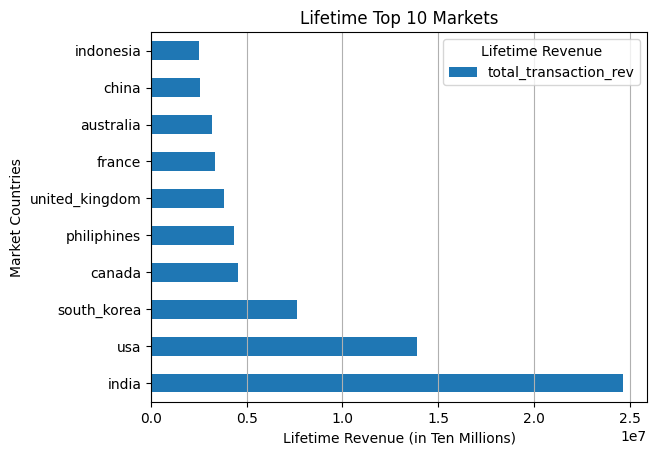

In [71]:
top_10_markets.plot(kind='barh',
                    title='Lifetime Top 10 Markets',
                    ylabel='Market Countries',
                    xlabel='Lifetime Revenue (in Ten Millions)')
plt.legend(title='Lifetime Revenue',
           loc='upper right')
plt.grid(axis='x')
plt.show()

Based on the total revenue our main customer demographic is primarily from India, the US, South Korea, and other EU and Pacific countries. Since AtliQ Hardware is based in India it is no surprise that most of our revenue comes domestically. This is a good sign for AtliQ Hardware since they have a large penetration into one of the largest total addressable markets in the world since India now has the largest population. In addition, AtliQ Hardware also has a strong foothold in the US market, which is a large consumer of computer products. With the strained relationship the US has with China, the US will also start to move their consumption from Chinese-made products to Indian-made products which could also boost revenue significantly from US consumers. This shows that AtliQ Hardware still has room to grow its business not only in the US but also in other developing countries. For example, in developing countries like Mexico, Indonesia, and Vietnam their economies are growing at a rapid pace creating more jobs leaving people with more disposable income to spend on amenities such as computer parts.

##### Who are the top 20 customers?

To find the top 20 customers we simply need to group the customers by lifetime revenue and list the top 20

In [72]:
customer_lifetime_rev = customers.groupby(['customer']).agg({'total_transaction_rev':'sum'}).astype(int).sort_values(by='total_transaction_rev', ascending=False).head(20)
customer_lifetime_rev

,total_transaction_rev
customer,
amazon,12278189
atliq_e_store,7748695
atliq_exclusive,7304868
sage,3193519
flipkart,2970748
leader,2892454
ebay,2162982
electricalsocity,1791627
neptune,1700210


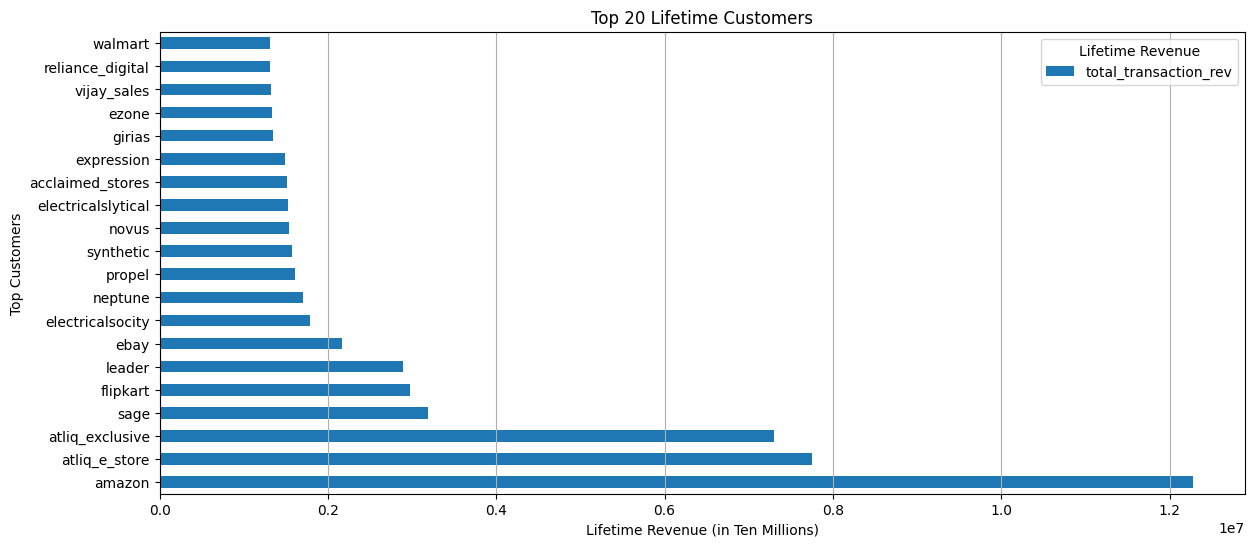

In [73]:
customer_lifetime_rev.plot(kind='barh',
                           title='Top 20 Lifetime Customers',
                           ylabel='Top Customers',
                           xlabel='Lifetime Revenue (in Ten Millions)',
                           figsize=(14, 6))
plt.legend(title='Lifetime Revenue',
           loc='upper right')
plt.grid(axis='x')
plt.show()

Based on their top 20 lifetime customers, Amazon, AtliQ E Store, and AtliQ Exclusive, are their largest customers by a significant margin.

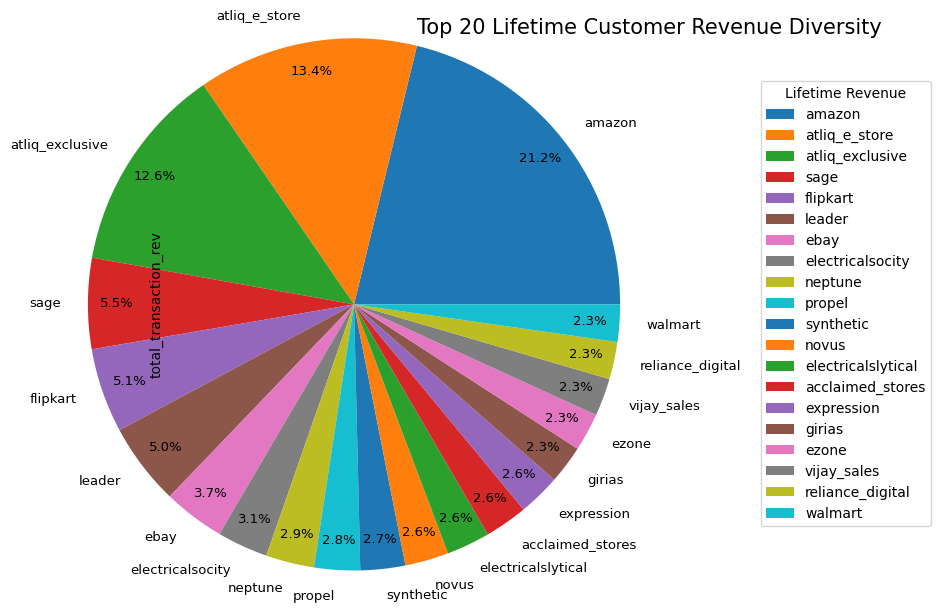

In [74]:
customer_lifetime_rev.plot(kind='pie',
                           fontsize=9.5,
                           radius=1.8,
                           autopct='%1.1f%%',
                           pctdistance=0.89,
                           subplots=True)
plt.legend(title='Lifetime Revenue',
           loc=[1.6,-.1])
plt.title('Top 20 Lifetime Customer Revenue Diversity',
           fontsize=15,
           x= 1.3, y=1.21)
plt.show()

After charting the top 20 lifetime customers the top 3 customers make up almost half of the revenue of the top 20 customers. After the top 6 customers, it looks like the rest of our customers show a very similar level of revenue. This is a good thing to see as it shows our revenue streams are very diversified and the loss of any customer will not significantly affect our business.

##### Where are our top customers from?

To find where are top customers are from we can also group the customers by market to find where they are from

In [75]:
customers.groupby(['customer','market']).agg({'total_transaction_rev':'sum'}).astype(int).sort_values(by='total_transaction_rev', ascending=False).head(20)

,,total_transaction_rev
customer,market,
amazon,india,3754056
sage,south_korea,2782356
leader,south_korea,2753138
atliq_exclusive,india,2468239
amazon,usa,2251715
flipkart,india,1678228
neptune,china,1623533
novus,philiphines,1533943
propel,india,1455626


Researching more into our top customers, it is not surprising to see that all of our top customers also from our top 10 markets.

##### What is the preferred platform for transaction?

To find the preferred platform from our top customers we can add platform to the groupby method to our customer dataframe

In [76]:
customers.groupby(['customer','market','platform']).agg({'total_transaction_rev':'sum'}).astype(int).sort_values(by='total_transaction_rev', ascending=False).head(20)

,,,total_transaction_rev
customer,market,platform,
amazon,india,e-commerce,3754056
sage,south_korea,brick_&_mortar,2782356
leader,south_korea,brick_&_mortar,2753138
atliq_exclusive,india,brick_&_mortar,2468239
amazon,usa,e-commerce,2251715
flipkart,india,e-commerce,1678228
neptune,china,brick_&_mortar,1623533
novus,philiphines,brick_&_mortar,1533943
propel,india,brick_&_mortar,1455626


Looking at our top customers, most of their preferred platform for transaction is through brick and mortar stores. This is somewhat surprising since many modern businesses are gravitating towards more online sales. To see if this is consistent with all their other customers we can use value_counts on the platform column to find the number of customers who shop through brick and mortar stores and customers who shop online.

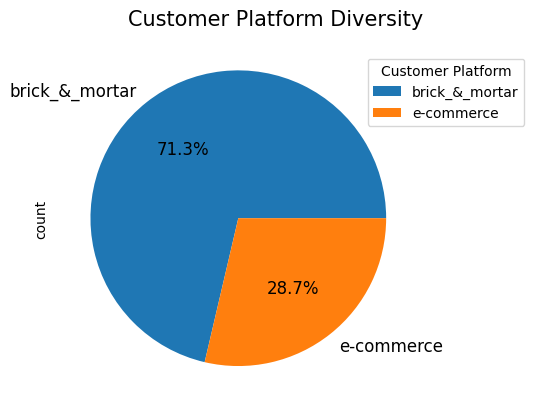

In [77]:
customers['platform'].value_counts().plot(kind='pie',
                                          fontsize=12,
                                          radius=1,
                                          autopct='%1.1f%%',
                                          subplots=True)
plt.legend(title='Customer Platform',
           loc=[.85,.75])
plt.title('Customer Platform Diversity',
           fontsize=15,
           x=.6, y=1)
plt.show()

According to the data we have access to, about 70% of our customers are brick and mortar stores which is a similar to what was seen previously in the top 20 customers. However, it might be better to group the platforms by revenue to see how much each customer purches on each platform.

In [78]:
rev_pie = customers.groupby('platform').agg({'total_transaction_rev':'sum'}).astype(int).sort_values(by='total_transaction_rev', ascending=False)

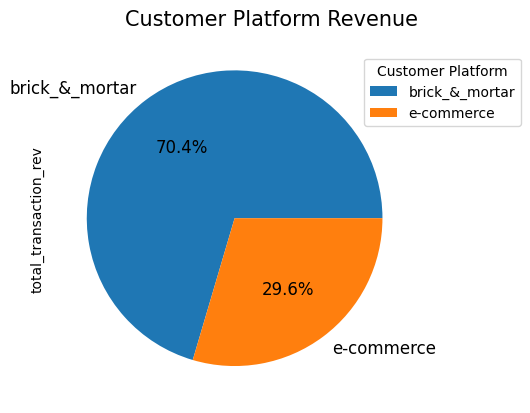

In [79]:
rev_pie.plot(kind='pie',
             fontsize=12,
             radius=1,
             autopct='%1.1f%%',
             subplots=True)
plt.legend(title='Customer Platform',
           loc=[.85,.75])
plt.title('Customer Platform Revenue',
           fontsize=15,
           x=.6, y=1)
plt.show()

After looking at the total revenue share for each platform, it shows very little difference in customer platform revenue performance. Brick and mortar stores are a large majority of our businesss. However, this gives us a chance to try to expand to more ecommerce businesses. 

#### Part 2: Identifying Top Sold Products

##### Which product categories are the best sellers by proft and volume?

To find the best performing product we are going to create a dataframe that contains all product related data

In [80]:
products = dim_product.merge(fact_gross_price, on='product_code')
products = products.merge(fact_sales_monthly, on=['product_code','fiscal_year'])
products.head()

,product_code,division,segment,category,product,variant,fiscal_year,gross_price,date,customer_code,sold_quantity
0,A0118150101,p_&_a,peripherals,internal_hdd,aq_dracula_hdd_–_3.5_inch_sata_6_gb/s_5400_rpm...,standard,2018,15.3952,2017-09-01,70002017.0,51.0
1,A0118150101,p_&_a,peripherals,internal_hdd,aq_dracula_hdd_–_3.5_inch_sata_6_gb/s_5400_rpm...,standard,2018,15.3952,2017-09-01,70002018.0,77.0
2,A0118150101,p_&_a,peripherals,internal_hdd,aq_dracula_hdd_–_3.5_inch_sata_6_gb/s_5400_rpm...,standard,2018,15.3952,2017-09-01,70003181.0,17.0
3,A0118150101,p_&_a,peripherals,internal_hdd,aq_dracula_hdd_–_3.5_inch_sata_6_gb/s_5400_rpm...,standard,2018,15.3952,2017-09-01,70003182.0,6.0
4,A0118150101,p_&_a,peripherals,internal_hdd,aq_dracula_hdd_–_3.5_inch_sata_6_gb/s_5400_rpm...,standard,2018,15.3952,2017-09-01,70006157.0,5.0


In the new product dataframe we also want to create a new column to calculate the gross revenue from each transaction to find which product is the best seller

In [81]:
products['total_transaction_rev'] = products['sold_quantity'] * products['gross_price']
products.head()

,product_code,division,segment,category,product,variant,fiscal_year,gross_price,date,customer_code,sold_quantity,total_transaction_rev
0,A0118150101,p_&_a,peripherals,internal_hdd,aq_dracula_hdd_–_3.5_inch_sata_6_gb/s_5400_rpm...,standard,2018,15.3952,2017-09-01,70002017.0,51.0,785.1552
1,A0118150101,p_&_a,peripherals,internal_hdd,aq_dracula_hdd_–_3.5_inch_sata_6_gb/s_5400_rpm...,standard,2018,15.3952,2017-09-01,70002018.0,77.0,1185.4304
2,A0118150101,p_&_a,peripherals,internal_hdd,aq_dracula_hdd_–_3.5_inch_sata_6_gb/s_5400_rpm...,standard,2018,15.3952,2017-09-01,70003181.0,17.0,261.7184
3,A0118150101,p_&_a,peripherals,internal_hdd,aq_dracula_hdd_–_3.5_inch_sata_6_gb/s_5400_rpm...,standard,2018,15.3952,2017-09-01,70003182.0,6.0,92.3712
4,A0118150101,p_&_a,peripherals,internal_hdd,aq_dracula_hdd_–_3.5_inch_sata_6_gb/s_5400_rpm...,standard,2018,15.3952,2017-09-01,70006157.0,5.0,76.9760


To find the best performing category we need to group the products dataframe by the category column and total the sold_quanity and total the revenue

In [82]:
products.groupby(['category']).agg({'sold_quantity':'sum','total_transaction_rev':'sum'}).astype(int).sort_values(by='category', ascending=False)

,sold_quantity,total_transaction_rev
category,,
internal_hdd,3130399,74456333
graphic_card,652536,12099575


According to the given data, the internal_hdd category sells more volume and generates more profit than the graphic_card category. After finding which category is our best performer it would be interesting to see which individual product is out best performer.

In [83]:
products.groupby(['category','product']).agg({'sold_quantity':'sum','total_transaction_rev':'sum'}).astype(int).sort_values(by='sold_quantity', ascending=False)

sold_quantity  \
category     product                                                             
internal_hdd aq_dracula_hdd_–_3.5_inch_sata_6_gb/s_5400_rpm_...        1211581   
             aq_werewolf_nas_internal_hard_drive_hdd_–_8.89_cm         1075354   
             aq_zion_saga                                               843464   
graphic_card aq_mforce_gen_x                                            652536   

                                                                 total_transaction_rev  
category     product                                                                    
internal_hdd aq_dracula_hdd_–_3.5_inch_sata_6_gb/s_5400_rpm_...               25433048  
             aq_werewolf_nas_internal_hard_drive_hdd_–_8.89_cm                26003959  
             aq_zion_saga                                                     23019325  
graphic_card aq_mforce_gen_x                                                  12099575

Looking at the sold products for these categories the best best selling product by volume is the internal_hdd product aq_dracula. However, the highest revenue generating product is the internal_hdd aq_werewolf.

##### Which variant is the most popular?

To find the total number of orders for each variant (standard, plus, premium) we need to total the sold quanities of each variant

In [84]:
variant_volume = products.groupby(['variant']).agg({'sold_quantity':'sum'}).astype(int).sort_values(by='sold_quantity', ascending=False)
variant_volume

,sold_quantity
variant,
standard,1522234
premium,1349540
plus,911161


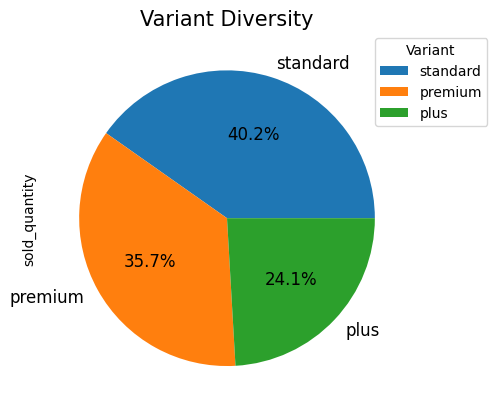

In [85]:
variant_volume.plot(kind='pie',
                    fontsize=12,
                    radius=1,
                    autopct='%1.1f%%',
                    subplots=True)
plt.legend(title='Variant',
           loc=[.9,.75])
plt.title('Variant Diversity',
           fontsize=15, 
           x=.5, y=1)
plt.show()

Based on the provided data sample, it shows that standard is the most popular variant across all products. However, it should be noted that many users who do not order the standard variant prefer to order the premium version over the plus version and overall customers are more likely to buy either the plus or premium variant over just the standard variant.

In [86]:
products.groupby(['product','variant']).agg({'sold_quantity':'sum','total_transaction_rev':'sum'}).astype(int).sort_values(by='total_transaction_rev', ascending=False)

sold_quantity  \
product                                            variant                   
aq_dracula_hdd_–_3.5_inch_sata_6_gb/s_5400_rpm_... premium          766715   
aq_mforce_gen_x                                    standard         601529   
aq_werewolf_nas_internal_hard_drive_hdd_–_8.89_cm  plus             370148   
                                                   standard         378195   
                                                   premium          327011   
aq_zion_saga                                       standard         319568   
                                                   plus             268082   
                                                   premium          255814   
aq_dracula_hdd_–_3.5_inch_sata_6_gb/s_5400_rpm_... plus             221924   
                                                   standard         222942   
aq_mforce_gen_x                                    plus              51007   

                                                             total_transaction_rev  
product                                            variant                          
aq_dracula_hdd_–_3.5_inch_sata_6_gb/s_5400_rpm_... premium                17117330  
aq_mforce_gen_x                                    standard               11179906  
aq_werewolf_nas_internal_hard_drive_hdd_–_8.89_cm  plus                    9028654  
                                                   standard                8875081  
                                                   premium                 8100223  
aq_zion_saga                                       standard                7818967  
                                                   plus                    7670057  
                                                   premium                 7530300  
aq_dracula_hdd_–_3.5_inch_sata_6_gb/s_5400_rpm_... plus                    4504476  
                                                   standard                3811240  
aq_mforce_gen_x                                    plus                     919668

Looking more into each individual product, it shows that the aq_dracula premium version sold the most units and generated the most revenue. The aq_dracula is then followed up by the aq_mforce standard variant, and then by the aq_werewolf product in the plus variant. Normally, standard variants of a product will sell the most units, however, AtliQ Hardware has multiple higher-quality variants that performed better than their standard variants from a sales perspective. This shows that many AtliQ Hardware customers love certain products from the manufacturer, and this is a good sign of strong customer demand for AtliQ Hardware products.

#### Part 3: Conclusions and Reccomendations

##### How can we improve the business and grow our customer base?

##### Reccomendations

In conclusion, AtliQ Hardware is a fast-growing business with strong customer demand for its products, however, there is still much more room for AtliQ Hardware to grow its business globally. For example, AtliQ Hardware has strong penetration in their domestic and US markets but now to grow their overall business they need to grow their business in other smaller markets.

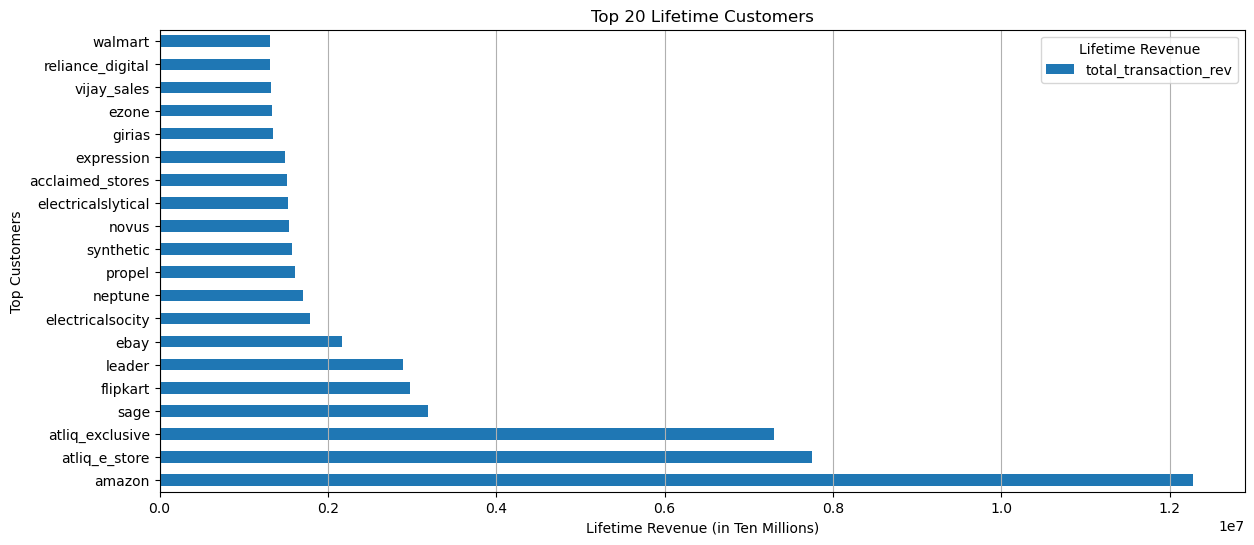

Outside of the top 3 customers, the revenue becomes more muted across many countries. We would recommend countries with emerging economies or countries with a strong computer gaming culture. Countries like Bangladesh, Mexico, Indonesia, and Vietnam are growing their economies at a rapid pace due to the deteriorating relationship the US has with China. This means more jobs will be created in these markets and their people will have more disposable income on leisurely activities, like gaming, or generally spend more time on their computers. Computer usage and online presence often increase as smaller countries have more access to more amenities as they make more money from their increase in job opportunities.

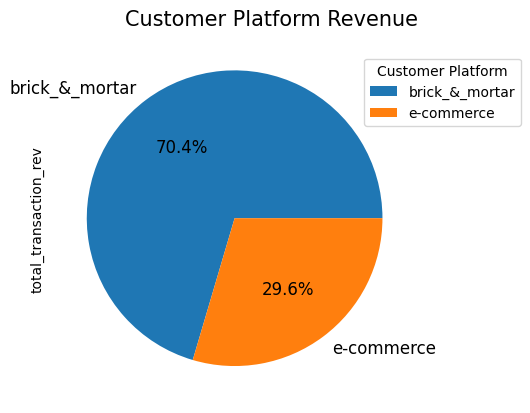

Also, AtliQ Hardware has the opportunity to significantly grow its online business. Many of the mentioned developing countries are geographically close to India and it is easier to increase ecommerce revenue from their customers in these regions than ones the Americas.

##### Conclusion

In conclusion, AtliQ Hardware is a fast-growing business that has the potential to increase its global presence in computer part manufacturing.

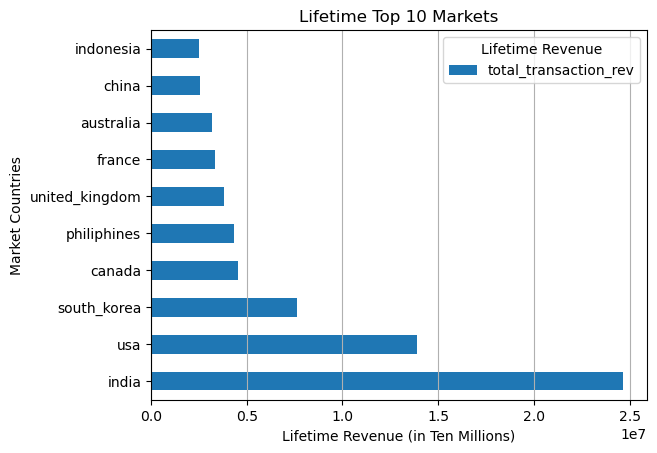

AtliQ Hardware also has a very diversified customer portfolio outside of its top 3 customers and has a very consistent revenue stream across all other counties. In addition, they also have the potential to grow outside their main markets as nearby counties develop their economies and their people have more disposable income on amenities like computers. 

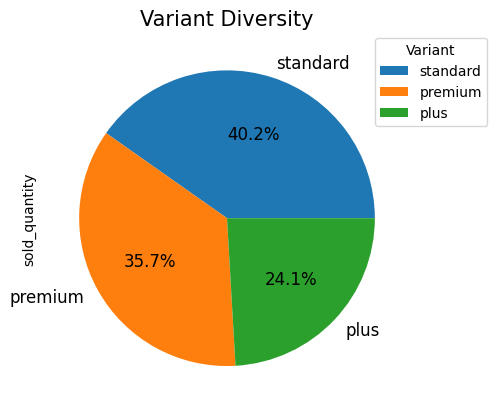

AtliQ Hardware has a strong customer relationship with their customers as their customers tend to purchase their higher variant products. AtliQ Hardware customers are more likely to purchase a plus or a premium version over just the standard version, showing a strong customer demand for our products.